# Student Exam Performance Workshop
Use Python's pandas module to load a dataset containing student demographic information and test scores and find relationships between student attributes and test scores. This workshop will serve as an introduction to pandas and will allow students to practice the following skills: 

- Load a csv into a pandas DataFrame and examine summary statistics
- Rename DataFrame column names
- Add columns to a DataFrame
- Change values in DataFrame rows
- Analyze relationships between categorical features and test scores

**Bonus:**

Determine the relationship between the students' lunch classification and average test scores by creating a seaborn boxplot

In [1]:
# Import the python modules that we will need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(path):
    df = pd.read_csv(path)
    return df

Use the `load_data` function to load the StudentsPerformance.csv file into a pandas dataframe variable titled `df`

__Hint__: Keep in mind where the csv file is in relation to this Jupyter Notebook. Do you need to provide an absolute or relative file path?

In [3]:
#Write python to call the function above and load the StudentPeformance csv file into a pandas dataframe
path = 'StudentsPerformance.csv'
df = load_data(path)

#Keep this line so you can see the first five rows of your dataframe once you have loaded it!
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


__Next step:__ Now that we have loaded our DataFrame, let's look at the summary statistics of our data. We can use the `describe` method to accomplish this:

In [4]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


By looking at this breakdown of our dataset, I can make at least the following observations:

1. Our DataFrame consists of eight columns, three of which are student test scores.
2. There are no missing any values in our DataFrame!
3. The data appears to be pretty evenly distributed.
4. The column names are long and difficult to type

## Renaming DataFrame Columns

Let's change our column names so they are easier to work with!

__Hint__: Look into the pandas `columns` attribute to make the change!

In [5]:
columns = ['gender', 'race', 'parentDegree', 'lunchStatus', 'courseCompletion', 'mathScore', 'readingScore', 'writingScore']

In [7]:
def renameColumns(df, columns):
    df.columns=columns
    return df

In [8]:
#Use the above function to rename DataFrame's column names, print out the first five rows of the DataFrame
#to ensure the change worked!
df = renameColumns(df, columns)
df.head(5)

,gender,race,parentDegree,lunchStatus,courseCompletion,mathScore,readingScore,writingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Adding Columns to a DataFrame

Great! Next I want to add a total scores column that is an average of the three given test scores. This will allow us to generalize the students' performance and simplify the process of us examining our feature's impact on student performance.  

In [9]:
df['avgScore'] = (df['mathScore'] + df['readingScore'] + df['writingScore'])/3
df.head(5)

,gender,race,parentDegree,lunchStatus,courseCompletion,mathScore,readingScore,writingScore,avgScore
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


## Analyzing Feature Relationships
Now that our data is looking the way we want, let's examine how some of our features correlate with students' test performances. We will start by looking at the relationship between race and parent degree status on test scores.

__Hint__: Use pandas' `groupby` method to examine these relationships. The documentation for `groupby` can be found here: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.groupby.html

In [10]:
df.groupby(['race','parentDegree']).mean()

mathScore  readingScore  writingScore   avgScore
race    parentDegree                                                        
group A associate's degree  61.000000     67.071429     63.571429  63.880952
        bachelor's degree   67.166667     68.083333     68.333333  67.861111
        high school         60.444444     62.888889     60.500000  61.277778
        master's degree     57.666667     64.666667     67.666667  63.333333
        some college        63.888889     65.777778     65.000000  64.888889
        some high school    58.916667     62.083333     58.583333  59.861111
group B associate's degree  66.097561     69.585366     68.243902  67.975610
        bachelor's degree   69.300000     72.950000     71.650000  71.300000
        high school         59.791667     63.458333     61.250000  61.500000
        master's degree     67.166667     80.166667     77.166667  74.833333
        some college        63.189189     65.756757     64.189189  64.378378
        some high school    61.815789     66.447368     64.605263  64.289474
group C associate's degree  66.730769     71.128205     70.269231  69.376068
        bachelor's degree   68.150000     75.675000     75.900000  73.241667
        high school         60.906250     64.421875     61.656250  62.328125
        master's degree     67.052632     70.526316     69.526316  69.035088
        some college        65.130435     69.420290     68.869565  67.806763
        some high school    60.551020     65.632653     63.285714  63.156463
group D associate's degree  67.600000     70.540000     69.860000  69.333333
        bachelor's degree   67.571429     70.142857     71.892857  69.869048
        high school         62.863636     64.409091     63.159091  63.477273
        master's degree     72.521739     77.173913     79.739130  76.478261
        some college        68.731343     70.880597     71.701493  70.437811
        some high school    66.760000     69.980000     69.100000  68.613333
group E associate's degree  74.897436     73.820513     73.205128  73.974359
        bachelor's degree   76.555556     74.833333     75.388889  75.592593
        high school         70.772727     70.318182     67.545455  69.545455
        master's degree     74.625000     82.125000     80.500000  79.083333
        some college        73.828571     72.628571     70.200000  72.219048
        some high school    72.111111     69.555556     66.555556  69.407407

From examining the above output, we can see that across all `race` groups, students with "high school" and "some high school" as their parent degree status (`parentDegree`) had lower test scores. 

__Next step__: Since there seems to be a clear distinction between students that have parents with have some college education and those that do not, let's simplify our DataFrame by creating a `degree_binary` column based on values in the `parentDegree` column. This new column will simply contain either "no_degree" or "has_degree." We can do this by writing a basic function and using pandas' `apply` method:

In [15]:
#Complete the following function to create a degree_binary column based on values in the parentDegree column:

def degree_status(edu):
    if edu in {'high school', 'some high school'}:
        return 'no_degree'
    return 'has_degree'

df['degree_binary'] = df['parentDegree'].apply(degree_status)
df.head(10)

,gender,race,parentDegree,lunchStatus,courseCompletion,mathScore,readingScore,writingScore,avgScore,degree_binary
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,has_degree
1,female,group C,some college,standard,completed,69,90,88,82.333333,has_degree
2,female,group B,master's degree,standard,none,90,95,93,92.666667,has_degree
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,has_degree
4,male,group C,some college,standard,none,76,78,75,76.333333,has_degree
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,has_degree
6,female,group B,some college,standard,completed,88,95,92,91.666667,has_degree
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,has_degree
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,no_degree
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,no_degree


Great job! Now let's continue examining our features to find relationships in our data

__Your turn:__ Use the `groupby` function again examine relationships between other features and student test scores. What can we learn about the relationship between these whether or not the students have completed the course and their test scores? What about the relationship between gender and test scores?

In [16]:
##Use groupby to examine the relationship between course completion status and test scores
df.groupby(['courseCompletion']).mean()

,mathScore,readingScore,writingScore,avgScore
courseCompletion,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


In [17]:
##Use groupby to examine the relationship between gender and test scores
df.groupby(['gender']).mean()

,mathScore,readingScore,writingScore,avgScore
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


## Bonus: Visualization

Great job making it this far! As a bonus exercise, we will create a simple data visualization. We have examined the relationship between all of our features and student test scores except for one -- student lunch status, which is found in the `lunch` column.

In order to explore this relationship, let's create a bar plot, with the students'`lunch` status as the x-axis and their average test scores (`avgScore`) as the y-axis.

We will use seaborn, which is a third-party library, to complete this visualization. If you do not already have seaborn installed, `pip install` it now! Follow the seaborn documentation to create the `barplot` in the cell below.

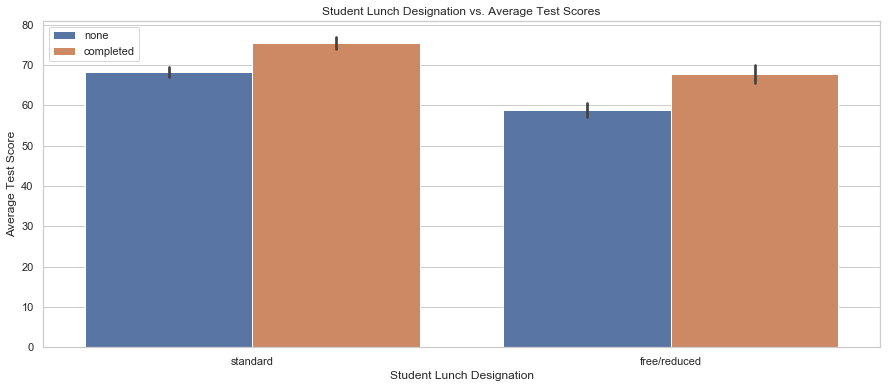

In [18]:
import seaborn as sns #import the seaborn library

sns.set(style='whitegrid')

def plot_details(data, xkey, ykey):
    
    #Manually set height/width using matplotlib
    height = 15   
    width = 6
    fig, ax = plt.subplots(figsize=(height,width))
    
    #instantiate seaborn barplot
    ax = sns.barplot(x=xkey, y=ykey,hue='courseCompletion', data=data, ax=ax)
    plt.xlabel('Student Lunch Designation')
    plt.ylabel('Average Test Score')
    plt.title('Student Lunch Designation vs. Average Test Scores')
    plt.legend(loc='upper left')
    
def graph_data(data, xkey='lunchStatus', ykey='avgScore'):
    plot_details(data,xkey,ykey)
    plt.show()
    
graph_data(df)